In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

Data Collection and Analysis

International_Education_Costs

In [11]:
# loading the diabetes dataset to a pandas DataFrame
df = pd.read_csv('International_Education_Costs.csv')

In [12]:
# pd.read_csv?

In [13]:
# printing the first 5 rows of the dataset
df.head()

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92


In [14]:
# number of rows and Columns in this dataset
df.shape

(907, 12)

In [15]:
# getting the statistical measures of the data
df.describe()

,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,2.836825,16705.016538,64.437486,969.206174,211.396913,700.077178,623.000695
std,0.945449,16582.385275,14.056333,517.154752,143.435740,320.374875,3801.746134
min,1.000000,0.000000,27.800000,150.000000,40.000000,200.000000,0.150000
25%,2.000000,2850.000000,56.300000,545.000000,100.000000,450.000000,0.920000
50%,3.000000,7500.000000,67.500000,900.000000,160.000000,650.000000,1.350000
75%,4.000000,31100.000000,72.200000,1300.000000,240.000000,800.000000,7.150000
max,5.000000,62000.000000,122.400000,2500.000000,490.000000,1500.000000,42150.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            907 non-null    object 
 1   City               907 non-null    object 
 2   University         907 non-null    object 
 3   Program            907 non-null    object 
 4   Level              907 non-null    object 
 5   Duration_Years     907 non-null    float64
 6   Tuition_USD        907 non-null    int64  
 7   Living_Cost_Index  907 non-null    float64
 8   Rent_USD           907 non-null    int64  
 9   Visa_Fee_USD       907 non-null    int64  
 10  Insurance_USD      907 non-null    int64  
 11  Exchange_Rate      907 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.2+ KB


Vizualization Section

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

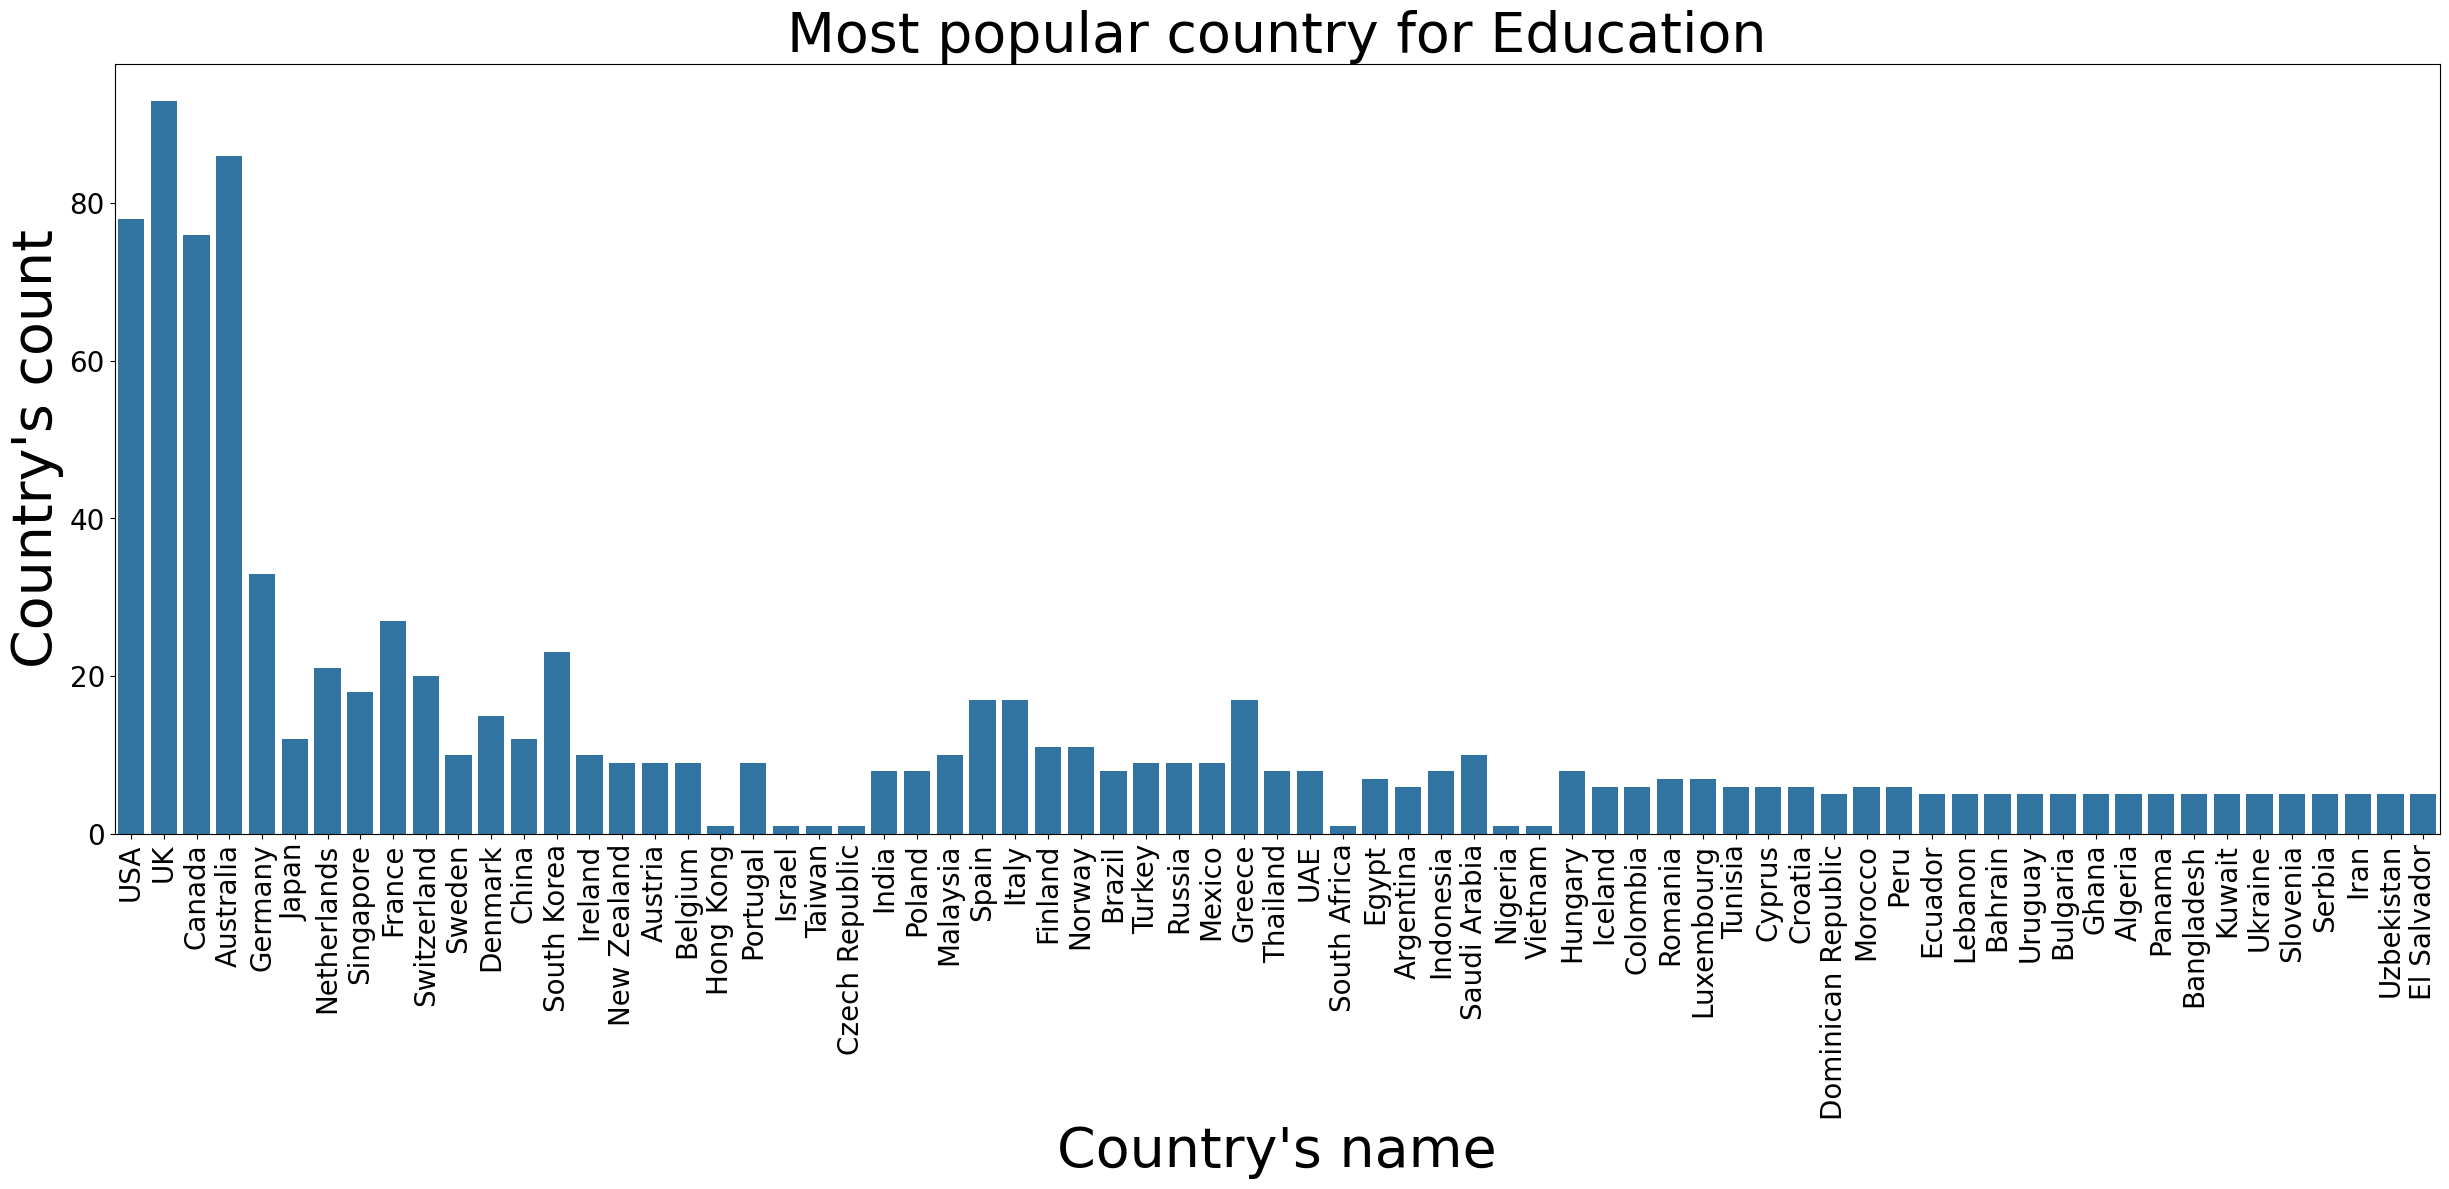

In [18]:
plt.figure(figsize=(30,10))
plt.title("Most popular country for Education", fontsize=40, color="black")
sns.countplot(data=df, x="Country")  # Corrected argument
plt.xlabel("Country's name", fontsize=40)
plt.ylabel("Country's count", fontsize=40)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)  # Removed rotation
plt.show()

Top 10 popular program and universites in World

In [19]:
top_10_program=df["Program"].value_counts().head(10)
top_10_universities=df["University"].value_counts().head(10)

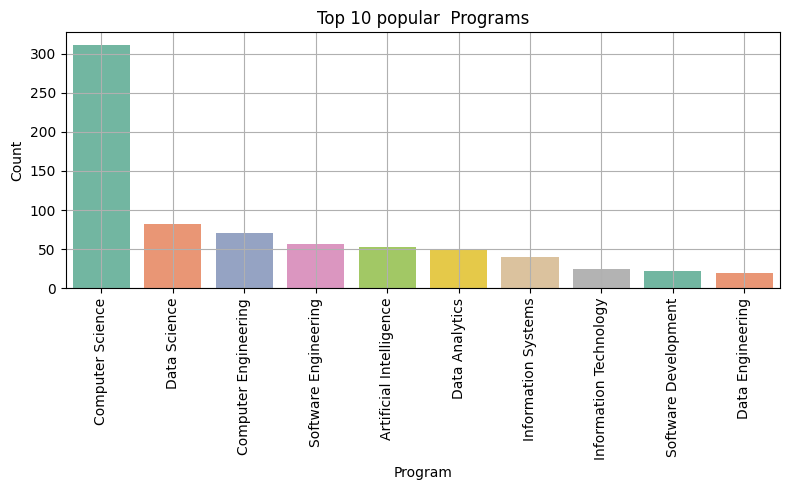

In [20]:
plt.figure(figsize=(8, 5))
sns.barplot(x=top_10_program.index, y=top_10_program.values, palette='Set2')
plt.title('Top 10 popular  Programs')
plt.xlabel('Program')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid("off")
plt.show()

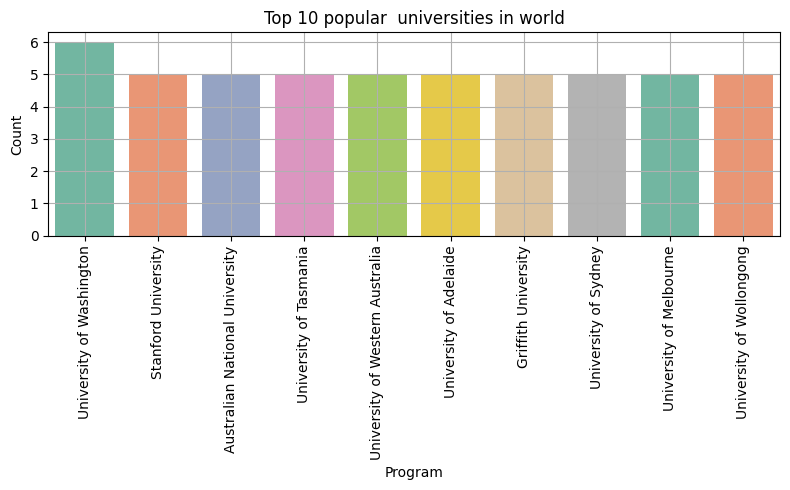

In [21]:
plt.figure(figsize=(8, 5))
sns.barplot(x=top_10_universities.index, y=top_10_universities.values, palette='Set2')
plt.title('Top 10 popular  universities in world')
plt.xlabel('Program')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid("off")
plt.show()

Correlation Matrix Before feature Engineering

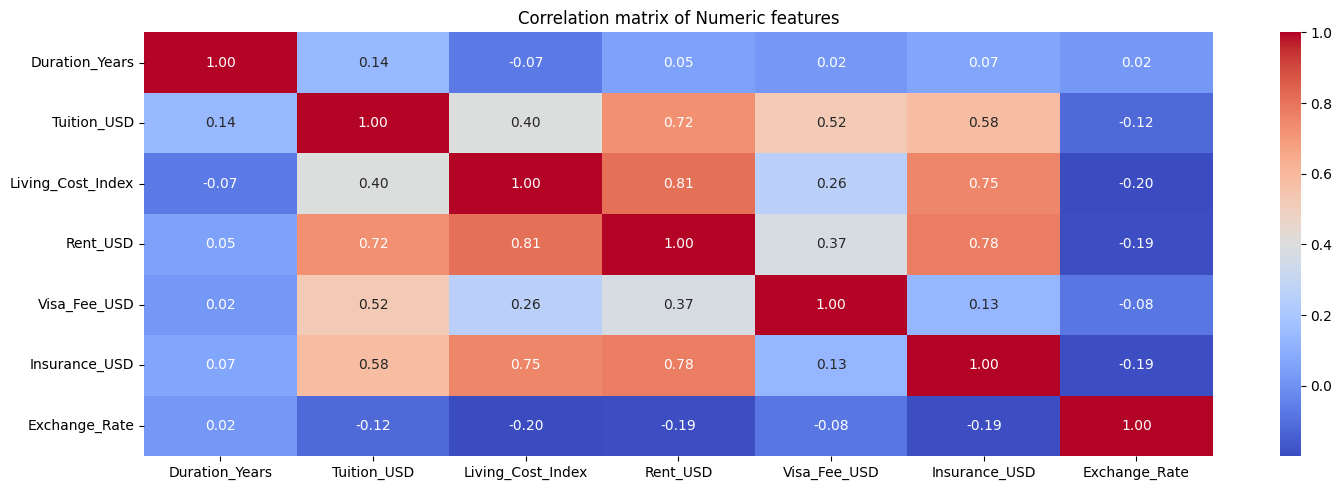

In [22]:
numeric_df = df.select_dtypes(include=[np.number])

if numeric_df.shape[1] >= 3:
    plt.figure(figsize=(15, 5))
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')  # Added cmap for better visualization
    plt.title('Correlation matrix of Numeric features')  # Removed unnecessary f-string
    plt.tight_layout()
    plt.show()

Making column for Total Expenditure in international education

In [23]:
df["Total_expenditure"]=df["Tuition_USD"] + df["Living_Cost_Index"] + df["Rent_USD"]+df["Visa_Fee_USD"]+df["Insurance_USD"]

checking outlier and fixing outlier

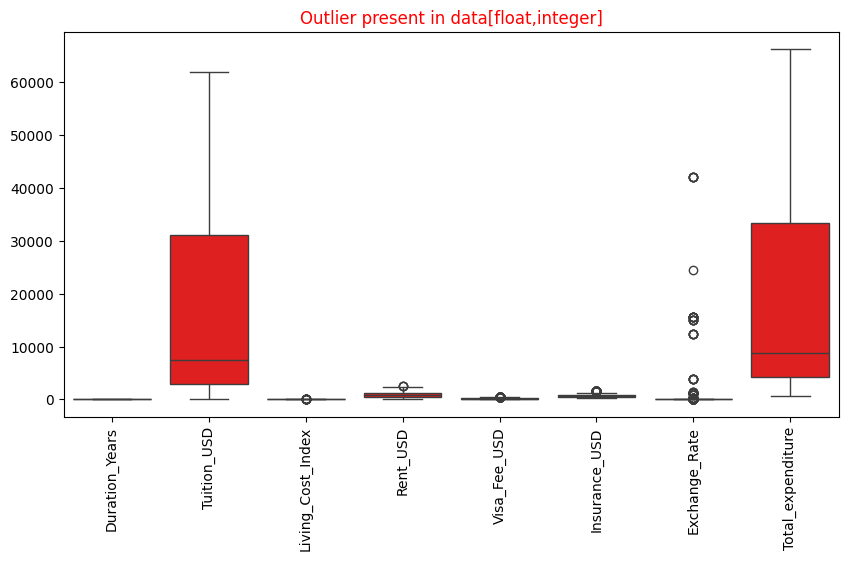

In [24]:
columns_int=[col for col in df.select_dtypes(include=["int","float"]).columns]
plt.figure(figsize=(10,5))
plt.title("Outlier present in data[float,integer]",color="red")
sns.boxplot(data=df[columns_int],color="red")
plt.xticks(rotation=90)
plt.show()

In [25]:
def remove_outlier_values(series):
    q1 = np.percentile(series, 25)
    q3 = np.percentile(series, 75)
    IQR = q3 - q1
    lower = q1 - 1.5 * IQR
    upper = q3 + 1.5 * IQR
    return series.where((series >= lower) & (series <= upper))
df["Exchange_Rate"]=remove_outlier_values(df["Exchange_Rate"])

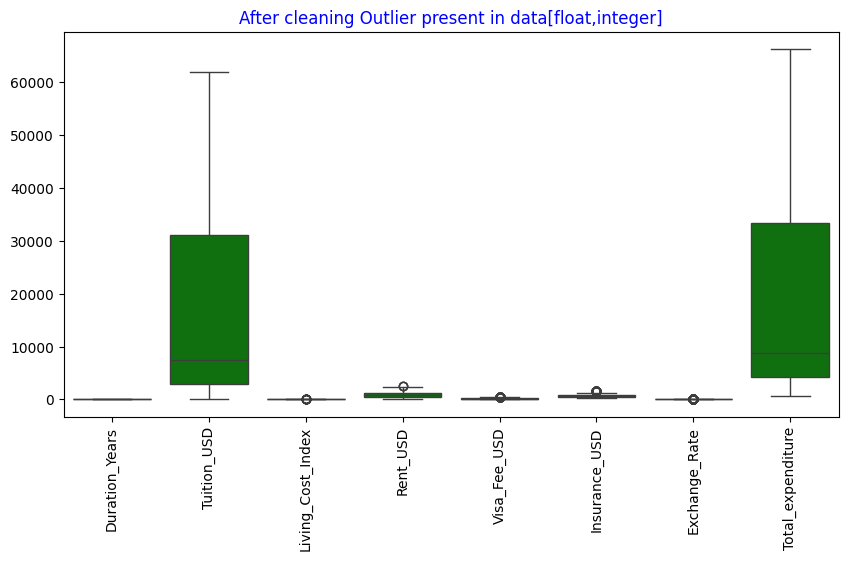

In [26]:
columns_int=[col for col in df.select_dtypes(include=["int","float"]).columns]
plt.figure(figsize=(10,5))
plt.title("After cleaning Outlier present in data[float,integer]",color="blue")
sns.boxplot(data=df[columns_int],color="green")
plt.xticks(rotation=90)
plt.show()

After removing outlier now we got null values also

In [27]:
df.isnull().sum()

,0
Country,0
City,0
University,0
Program,0
Level,0
Duration_Years,0
Tuition_USD,0
Living_Cost_Index,0
Rent_USD,0
Visa_Fee_USD,0


In [28]:
df.drop(columns=["Exchange_Rate"],inplace=True)

Training ML model

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
df.columns

Index(['Country', 'City', 'University', 'Program', 'Level', 'Duration_Years',
       'Tuition_USD', 'Living_Cost_Index', 'Rent_USD', 'Visa_Fee_USD',
       'Insurance_USD', 'Total_expenditure'],
      dtype='object')

In [31]:
x= df.drop(df.columns[11], axis=1)
y=df["Total_expenditure"]

In [32]:
y.isnull().sum()

np.int64(0)

In [33]:
x.tail()

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD
902,France,Strasbourg,University of Strasbourg,Data Analytics,Master,2.0,4000,70.2,1000,99,850
903,Malaysia,Nilai,USIM,Computer Science,Bachelor,3.0,6800,50.5,400,120,400
904,Saudi Arabia,Al-Ahsa,King Faisal University,Information Systems,Master,2.0,4200,64.2,600,200,800
905,USA,Seattle,University of Washington,Software Development,PhD,5.0,50000,77.8,2000,160,1500
906,UK,Nottingham,University of Nottingham,Data Engineering,Master,2.0,34000,61.2,800,485,800


In [34]:
y.head()

,Total_expenditure
0,59343.5
1,44360.8
2,41307.5
3,44571.2
4,2295.5


In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=41)

In [36]:
print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (725, 11)
x_test shape: (182, 11)
y_train shape: (725,)
y_test shape: (182,)


In [37]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder


categorical_feat=x_train.select_dtypes(include=["object"]).columns
nmerical_feat=x_train.select_dtypes(include=["float","int"]).columns

cat_transformer=Pipeline([
    ("encoder",OneHotEncoder(handle_unknown='ignore'))
])
num_transformer=Pipeline([("scaler",StandardScaler())])
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, nmerical_feat),
    ('cat', cat_transformer, categorical_feat)
])
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model',GradientBoostingRegressor(n_estimators=500,learning_rate=0.1))
])
pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)


r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.9998250894204435


Test-1

In [38]:
columns=x_train.columns
new_input = pd.DataFrame([[
    "USA",
    "Cambridge",
    "Harvard University",
    "Computer Science",
    "Master",
    2.0,
    55400,
    83.5,
    2200,
    160,
    1500
]], columns=columns)

prediction = pipe.predict(new_input)
print("Predicted Output:", prediction[0])

Predicted Output: 59325.95431099109


Test-2

In [39]:
columns=x_train.columns
new_input = pd.DataFrame([[
    "Malaysia",
    "Nilai",
    "USIM",
    "Computer Science",
    "Bachelor",
    3.0,
    6800,
    50.5,
    400,
    120,
    400
]], columns=columns)

prediction = pipe.predict(new_input)
print("Predicted Output:", prediction[0])

Predicted Output: 7750.337975120179


Test-3

In [40]:
columns=x_train.columns
new_input = pd.DataFrame([[
    "Cyprus",
    "Paphos",
    "Neapolis University",
    "Data Science",
    "Bachelor",
    3.0,
    7400,
    58.5,
    450,
    100,
    500
]], columns=columns)

prediction = pipe.predict(new_input)
print("Predicted Output:", prediction[0])

Predicted Output: 8605.349325814992


Actual vs Predicted Values

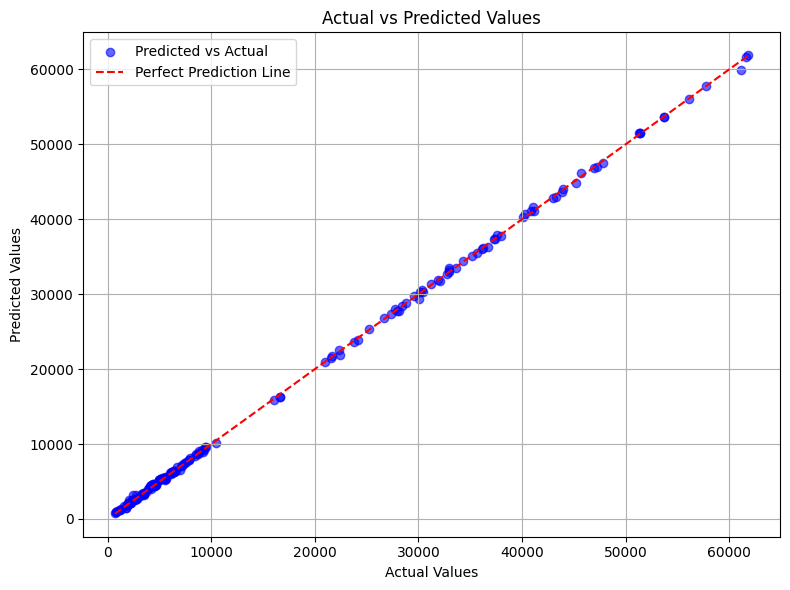

In [41]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()